In [1]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
# Simulation 1
# In a frame rotating with frequency of the incident field (Rotating Wave approximation)

In [4]:
# Assumptions

# Angle of incidence = 0 (thus, no effect of polarization)
# Incident light is monochromatic

# Considering non-interacting exciton system

In [5]:
# Constants

# h_bar = 1 (convention)
c = 1

# Incident field properties
wp = 1.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame
k = 0                        # TMD in-plane momentum
m = 1                        # Mass of exciton

w_ex = we + (k ** 2)/m - wp  # Frequency (energy) of the exciton in the Rotating frame

In [9]:
# Net Hamiltonian

def exc_rho1(g, w, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex-w), (gamma**2 + (w_ex-w)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    if ne.size:
        ne = np.max(ne)
    else:
        ne = 0
    
    return ne

def exc_rho2(g, w, gamma, beta):
    
    roots = np.roots([g**2, 2*g*(w_ex-w), (gamma**2 + (w_ex-w)**2), -1*(gamma**2)*(np.abs(beta)**2)])
    ne = roots[(roots - np.conj(roots))/(2*1j) == 0]
    if ne.size:
        ne = np.min(ne)
    else:
        ne = 0
    
    return ne

In [305]:
w = 0 * 2 * np.pi

g_vec = np.linspace(0.1,10,50)

ne_vec = []

for g in g_vec:
    
    beta = np.sqrt(3.5/g)
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25 * np.sqrt(rho)
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)
    
    ne = exc_rho(g, w, gamma, beta)
    
    ne_vec.append(ne)

Text(0.5, 1, 'Occupational Probability w.r.t g')

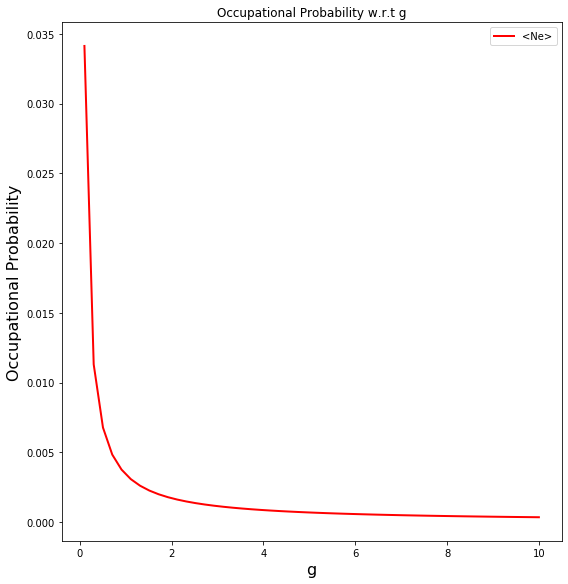

In [306]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(g_vec, ne_vec, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("g", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t g")

In [322]:
w_vec = np.linspace(0,4,100) * 2 * np.pi

g = -1 + 0*1j
beta = np.sqrt(3.5/g)

theta = np.pi/2

# Incident field properties
wp = 2.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

w_ex = we - wp

ne_expt = []
xe_expt = []
ri_expt = []
ro_expt = []

for w in w_vec:
    
    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)
    
    ne = exc_rho(g, w, gamma, beta)
    
    G0 = 1/(gamma - 1j*(w - (w_ex + g * ne)))
    
    xe = -1j * np.exp(-1j * theta) * gamma * beta * G0
    
    r_out = beta * np.sqrt(gamma) -1j*np.exp(1j*theta) * np.sqrt(gamma) * xe
    
    ne_expt.append(ne)
    xe_expt.append(xe)
    ri_expt.append(beta * np.sqrt(gamma))
    ro_expt.append(r_out)

rc = np.abs((np.array(ri_expt) - np.array(ro_expt))/np.array(ri_expt))**2

Text(0.5, 1, 'Occupational Probability w.r.t w')

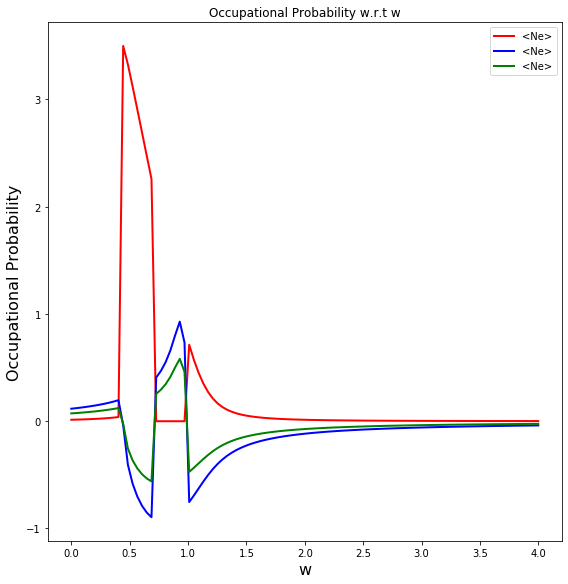

In [323]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(w_vec/(2*np.pi), ne_expt, 'r', linewidth=2, label="<Ne>")
axes.plot(w_vec/(2*np.pi), xe_expt, 'b', linewidth=2, label="<Ne>")
axes.plot(w_vec/(2*np.pi), ro_expt, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")

Text(0.5, 1, 'Occupational Probability w.r.t w')

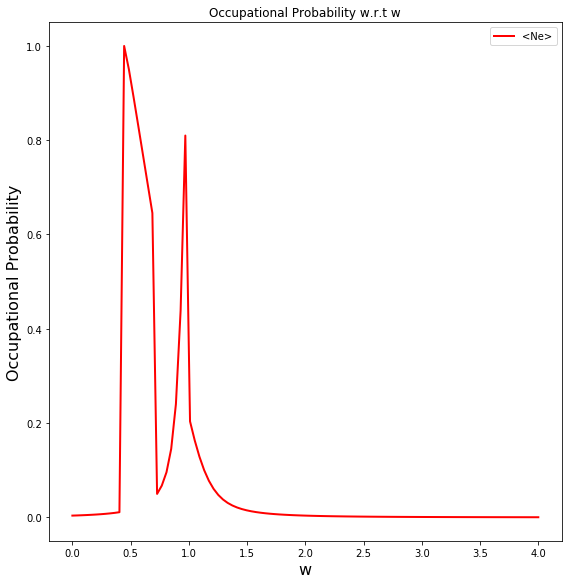

In [324]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(w_vec/(2*np.pi), rc, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")

In [31]:
wp_vec = np.linspace(0,10,100) * 2 * np.pi

g = 0
beta = 1

theta = np.pi/2

# Incident field properties
w = 0.0  * 2 * np.pi  # Frequency (energy) of the incident field

# Exciton properties
we = 3.0  * 2 * np.pi        # Frequency (energy) of the exciton in Lab frame

ne_expt1 = []
ne_expt2 = []
xe_expt = []
ri_expt = []
ro_expt1 = []
ro_expt2 = []

for wp in wp_vec:
    
    w_ex = we - wp

    # Rotating frame normalization
    rho = ((w+wp)/c)/np.sqrt((w + wp)**2 - (c*k)**2) # Normalization factor
    
    K = 0.25
    
    # Radiative decay of excitons into right(left) moving modes
    gamma = 2 * np.pi * (K ** 2)
    
    ne1 = exc_rho1(g, w, gamma, beta)
    ne2 = exc_rho2(g, w, gamma, beta)
    
    G0 = 1/(gamma - 1j*(w - (w_ex + g * ne1)))
    
    xe = -1j * np.exp(-1j * theta) * gamma * beta * G0
    
    r_out = beta * np.sqrt(gamma) -1j*np.exp(1j*theta) * np.sqrt(gamma) * xe
    
    ro_expt1.append(r_out)
    
    G0 = 1/(gamma - 1j*(w - (w_ex + g * ne2)))
    
    xe = -1j * np.exp(-1j * theta) * gamma * beta * G0
    
    r_out = beta * np.sqrt(gamma) -1j*np.exp(1j*theta) * np.sqrt(gamma) * xe
    
    ne_expt1.append(ne1)
    ne_expt2.append(ne2)
    xe_expt.append(xe)
    ri_expt.append(beta * np.sqrt(gamma))
    ro_expt2.append(r_out)

rc1 = np.abs((np.array(ri_expt) - np.array(ro_expt1))/np.array(ri_expt))**2
rc2 = np.abs((np.array(ri_expt) - np.array(ro_expt2))/np.array(ri_expt))**2

/home/aakash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1, 'Occupational Probability w.r.t w')

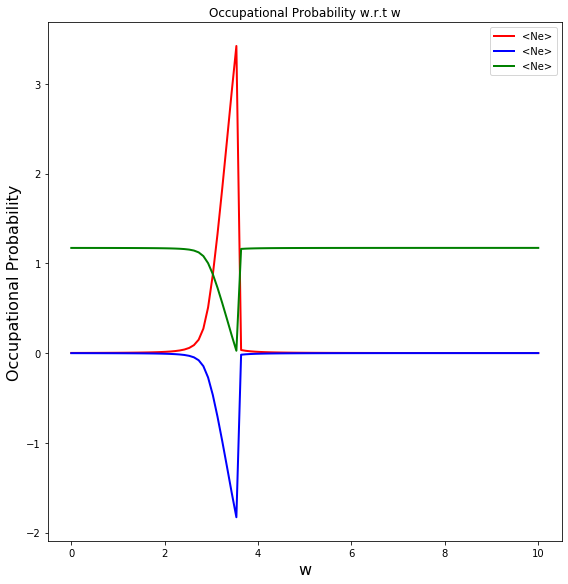

In [335]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), ne_expt, 'r', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), xe_expt, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), ro_expt, 'g', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")

Text(0.5, 1, 'Occupational Probability w.r.t w')

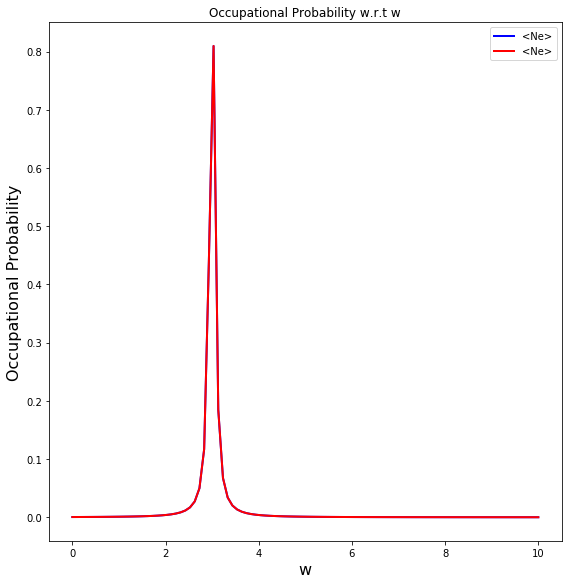

In [32]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))

axes.plot(wp_vec/(2*np.pi), rc1, 'b', linewidth=2, label="<Ne>")
axes.plot(wp_vec/(2*np.pi), rc2, 'r', linewidth=2, label="<Ne>")
axes.set_ylabel("Occupational Probability", fontsize=16)
axes.set_xlabel("w", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()
axes.set_title("Occupational Probability w.r.t w")